<a href="https://colab.research.google.com/github/QuarkNet-HEP/coding-camp/blob/main/Falcon_9_Rocket_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the modules we'll need
import pandas as pd
import numpy as np
from scipy.integrate import simps
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
 
# Set the graph size to be large
#plt.rcParams['figure.figsize'] = (10,6)
#plt.rcParams['figure.dpi'] = 600
 
#Importing the data set
data_url = "https://raw.githubusercontent.com/Peter-Apps/Coding-in-MS-HS/master/Falcon%209%20Rocket%20Data.csv"
data = pd.read_csv(data_url,on_bad_lines='skip')

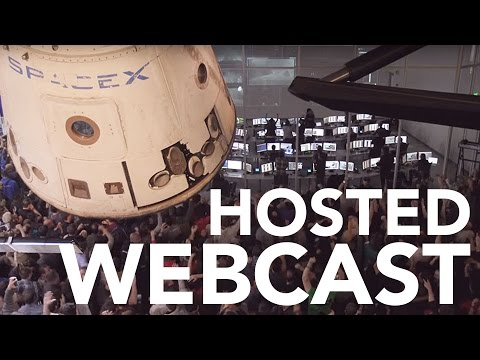

In [ ]:
# Video player
from IPython.display import YouTubeVideo

YouTubeVideo('ivdKRJzl6y0', width=800, height=300, start = 1302)

This Data was obtained from [nasaspaceflight.com](https://forum.nasaspaceflight.com/index.php?PHPSESSID=ifk0betabqbh2rrgjp10rfis2n&topic=40983.0;all) created by SpaceOpera from OCR Recognization of SpaceX Youtube videos. The current dataset is for the JASON-3 launch

There are a couple of useful commands we can use to view the data. The first is ``` data.head(n) ``` which shows us the first *n* lines of the table. The second is ``` data.shape``` which shows us the number of rows and columns in the data.

Use the code block below to answer the following questions


1.   What are the column headings in the data table?
2.   How long is it between data measurements?
3.   How many data points are there in this data table?




In [ ]:
# I'm a code block, enter your commands here
data.head(5)

,Time,Altitude,Velocity
0,0.0,0.000000,0.000000
1,0.1,0.583558,0.573479
2,0.2,1.207857,0.790573
3,0.3,1.872163,0.928331
4,0.4,2.536101,1.153755


# Graphing the Data #
One of the main ways we're going to use this platform is to easily make graphs of the data. Here's an example where we create a simple plot. 
> Creating a simple distance vs time graph  






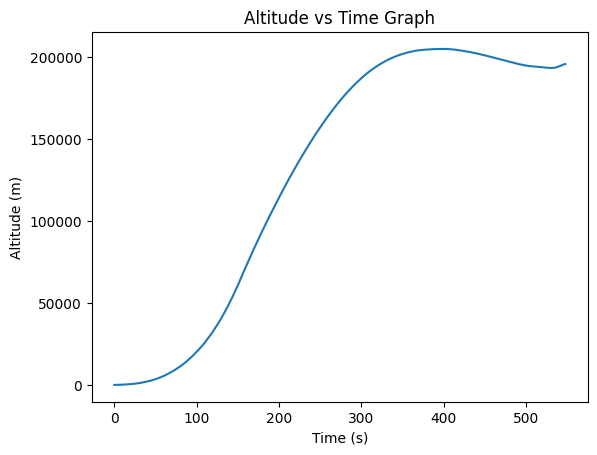

In [ ]:
plt.plot(data["Time"], data["Altitude"]) # Telling what data to plot (x,y)
plt.title("Altitude vs Time Graph")      # Adding a Title
plt.xlabel("Time (s)")                   # Adding axis labels
plt.ylabel("Altitude (m)")

# This is for if you want to 
# Save the image (Look in the file folder on the left side to find them)
plt.savefig("Altitude vs Time graph.png",dpi = 400, bbox_inches = "tight")               

plt.show()                               # Showing the graph


Your turn! Use the example above to create a   Velocity vs Time graph

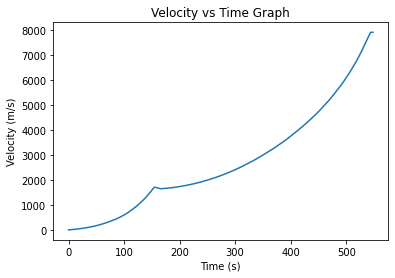

In [ ]:
# I'm a code block, enter your commands here

plt.plot(data["Time"], data["Velocity"]) # Telling what data to plot (x,y)
plt.title("Velocity vs Time Graph")      # Adding a Title
plt.xlabel("Time (s)")                   # Adding axis labels
plt.ylabel("Velocity (m/s)")
plt.show()

###Extension - Plotting multiple graphs on the same axis ###

Sometimes it's useful to plot 2 graphs on the same set of axis so we can better see patterns and features in the data. Here's an example of plotting the velocity and altitude data 

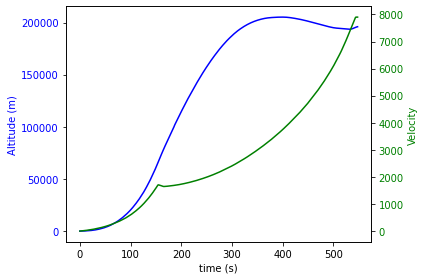

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('time (s)')
ax1.set_ylabel("Altitude (m)", color="blue")
ax1.plot(data["Time"], data["Altitude"], color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # add a second axes that shares the same x-axis

ax2.set_ylabel('Velocity', color="green")  # we already handled the x-label with ax1
ax2.plot(data["Time"], data["Velocity"], color="green")
ax2.tick_params(axis='y', labelcolor="green")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculations #
##Calculating the acceleration## 
Remember we can find the acceleration of the rocket using $a = \frac{\Delta v}{\Delta t} = \frac{d}{dt}v$  

1.   Why is the acceleration on the first line NaN (not a number)?



In [ ]:
data["Acceleration"] = (data["Velocity"].diff()/data["Time"].diff())
data.head(5)

,Time,Altitude,Velocity,Acceleration
0,0.0,0.000000,0.000000,NaN
1,0.1,0.583558,0.573479,5.734792
2,0.2,1.207857,0.790573,2.170943
3,0.3,1.872163,0.928331,1.377580
4,0.4,2.536101,1.153755,2.254231


In [ ]:
# The NaN for the acceleration will cause errors later on.
# We're going to use this command to replace it with a 0.
data = data.fillna(0);


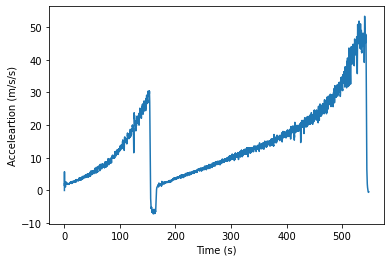

In [ ]:
plt.plot(data["Time"],data["Acceleration"])
plt.xlabel("Time (s)")
plt.ylabel("Acceleartion (m/s/s)")
plt.show()


Questions to ponder:

1.   How does the shape of the acceleration graph relate to the shape of the velocity graph you made?
2.   What's up with the wierd dips at ~150s and ~ 550s?
3.   What is the lowest value for the acceleration? Hint: 
```
 min(list of numbers)
```





In [ ]:
# I'm a code block, use me to help with the questions!


## Calculating Velocity from Acceleration ##
The velocity can also be determined by looking at the **area under the acceleration curve**. For most of our cases, we'll be using simple geometric shapes, but the code below can do it for any raw set of data. For those of you in AP Calc, this uses the trapezoid method to find the area.

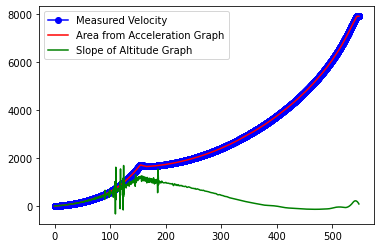

In [ ]:
# Calculate the velocity from the acceleration data
import scipy.integrate as it
data["Calc Vel from Accel"] = it.cumtrapz(data["Acceleration"],data["Time"],initial=0)

# Calculate velocity from the position data
data["Calc Vel from Altitude"] = data["Altitude"].diff()/data["Time"].diff()

# Let's graph it to see if there's any major differences
plt.plot(data["Time"],data["Velocity"], label = "Measured Velocity", color = "blue",marker='o')
plt.plot(data["Time"],data["Calc Vel from Accel"], label = "Area from Acceleration Graph", color = "red")
plt.plot(data["Time"], data["Calc Vel from Altitude"], label = "Slope of Altitude Graph", color = "green", linestyle = None)
plt.legend()
plt.show()



Likewise we can find the position (Altitude) from the area under the velocity graph. Use the example above and see if you can create a graph showing the measured altitude and the calculated altitude

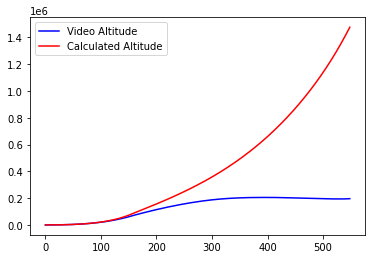

In [ ]:
data["Calc Altitude from Vel"] = it.cumtrapz(data["Velocity"],data["Time"],initial=0)

plt.plot(data["Time"], data["Altitude"], label = "Video Altitude", color = "blue")
plt.plot(data["Time"], data["Calc Altitude from Vel"], label = "Calculated Altitude", color = "red")
plt.legend()
plt.show()

At this point you might have noticed a few strange things in the last few graphs. The calculated velocity from the slope of the altitude graph and the calculated altitude from the velocity graph don't agree with their measured values from the video. 

Any ideas why that could be? (and blaming the computer isn't a good one)

## Credits
This notebook was designed by Quarknet Coding Fellow Peter Apps. Thanks to the great folks at [Binder](https://mybinder.org/) and [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) for making this notebook interactive without you needing to download it or install [Jupyter](https://jupyter.org/) on your own device.